# Part 1 - test the padding

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [107]:
def FT(signal, spacing):
	oversample 	= 1 										# oversample folds; to be experiemented further
	n 			= 2**(int(np.log(signal.size)/np.log(2))+1 + oversample)
	fourier 	= np.fft.fft(signal, n)
	freq 		= np.fft.fftfreq(n, d=spacing)	
	power 		= np.abs(fourier)
	phase 		= np.angle(fourier)
	return [fourier, power, phase, freq]

def FT2(signal, spacing):
	n 			= signal.size
	fourier 	= np.fft.fft(signal, n)
	freq 		= np.fft.fftfreq(n, d=spacing)	
	power 		= np.abs(fourier)
	phase 		= np.angle(fourier)
	return [fourier, power, phase, freq]

def gaussian(x, gamma, beta, alpha):
	return 1/gamma * np.exp(-alpha * np.power(x - beta, 2.)) 	

## Zero Padding

### signal

Text(0.5, 1.0, 'signal')

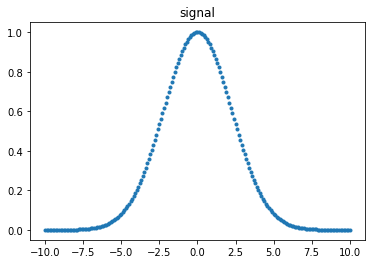

In [108]:
x = (np.arange(201)-100)/10
ccf = gaussian(x, 1, 0, 0.1)
plt.plot(x, ccf, '.')
plt.title('signal')

### Fourier transform of the signal

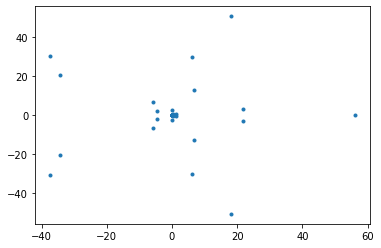

In [109]:
ft, power, phase, freq = FT(ccf, 0.1)
plt.plot(np.array(ft).real, np.array(ft).imag, '.')
plt.show()

### power spectrum

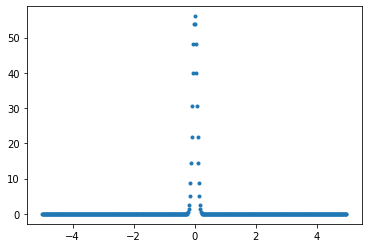

In [110]:
plt.plot(freq, power, '.')
plt.show()

### inverse Fourier transform

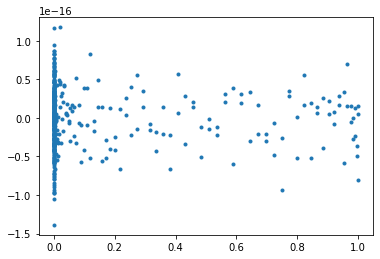

In [111]:
ift = np.fft.ifft(ft)
plt.plot(np.array(ift).real, np.array(ift).imag, '.')
plt.show()

Note the small imaginary part. Now take the absolute value.

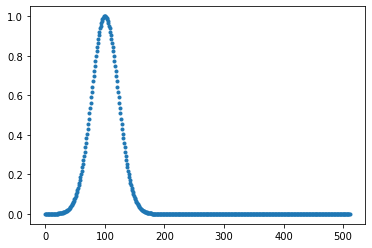

In [112]:
iccf = abs(ift)
plt.plot(iccf, '.') 
plt.show()

**Conclusion: padding does not add additional information**

## No Zero-padding

### power spectrum

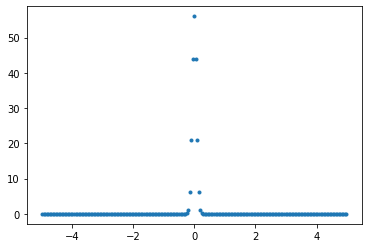

In [113]:
ft, power, phase, freq = FT2(ccf, 0.1)
plt.plot(freq, power, '.')
plt.show()

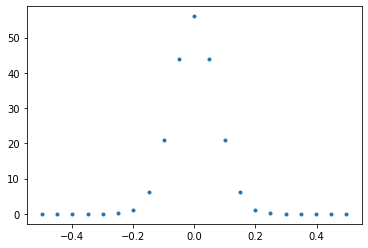

In [114]:
# Zoom-in
idx = abs(freq)<0.5
plt.plot(freq[idx], power[idx], '.')
plt.show()

### inverse Fourier transform

/Users/az/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


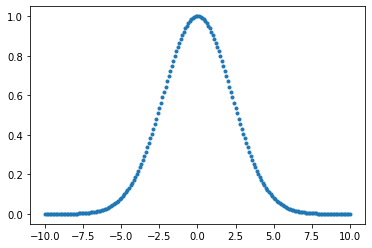

[4.53999298e-05+2.57835144e-19j 5.53961755e-05+2.43728440e-17j
 6.74583627e-05-2.74754079e-18j 8.19828893e-05-1.72296736e-17j
 9.94356357e-05-5.95961473e-18j 1.20362805e-04-1.12596152e-17j
 1.45403198e-04-1.17315776e-17j 1.75302063e-04+1.13328856e-17j
 2.10926674e-04-6.93789013e-18j 2.53283790e-04-2.11798787e-18j
 3.03539138e-04+5.94194807e-17j 3.63039106e-04+6.06897027e-19j
 4.33334765e-04+6.15508298e-17j 5.16208399e-04+5.29030967e-17j
 6.13702669e-04+2.07388609e-18j 7.28152539e-04+4.50988637e-17j
 8.62220086e-04+3.91471336e-17j 1.01893226e-03+8.14958448e-17j
 1.20172170e-03-8.00651090e-18j 1.41447053e-03+3.92247806e-17j
 1.66155727e-03+3.96916763e-17j 1.94790664e-03-2.48400552e-17j
 2.27904223e-03+6.92606715e-18j 2.66114180e-03-4.21800844e-17j
 3.10109501e-03+4.44458770e-17j 3.60656314e-03+1.25122634e-18j
 4.18604042e-03+2.46102318e-18j 4.84891651e-03+6.82493753e-17j
 5.60553935e-03-1.66954873e-17j 6.46727781e-03-4.96042109e-17j
 7.44658307e-03+1.40703823e-17j 8.55704807e-03+1.383370

In [115]:
ift = np.fft.ifft(ft)
plt.plot(x, ift, '.') 
plt.show()
print(ift)

Numerical error in the imaginary part.

### residuals

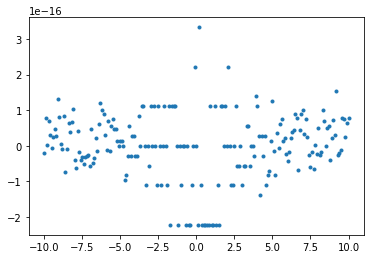

In [116]:
iccf = abs(ift)
plt.plot(x, iccf-ccf, '.')
plt.show()

# Part 2 - test the cutoff

In [123]:
# select the ft with freq < 0.2
idx = abs(freq)<0.2
print(freq[idx])

[ 0.          0.04975124  0.09950249  0.14925373  0.19900498 -0.19900498
 -0.14925373 -0.09950249 -0.04975124]


In [124]:
freq[idx].size

9

In [125]:
ft[idx]

array([ 56.04952199+0.j        , -43.89665209-0.68615239j,
        21.08522217+0.65933098j,  -6.21257925-0.29151805j,
         1.12228637+0.07025607j,   1.12228637-0.07025607j,
        -6.21257925+0.29151805j,  21.08522217-0.65933098j,
       -43.89665209+0.68615239j])

In [126]:
# construct a pseudo ft, i.e. power is set 0 where freq>0.25
pseudo_ft = copy.copy(ft)
pseudo_ft[~idx] = 0

/Users/az/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


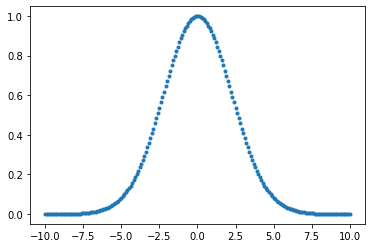

[ 1.22426071e-03-1.51896185e-18j  1.20013502e-03+1.33944818e-17j
  1.15261836e-03-3.31409858e-18j  1.08316747e-03-6.73405722e-18j
  9.93936196e-04+7.12714836e-18j  8.87738777e-04-4.06940726e-18j
  7.68002636e-04-1.00967573e-17j  6.38711751e-04+3.06824909e-18j
  5.04342289e-04-2.54868381e-18j  3.69792284e-04-1.08162649e-17j
  2.40307382e-04+1.92254884e-18j  1.21404807e-04+1.66655484e-18j
  1.87978373e-05-8.49796162e-18j -6.16768889e-05+3.94413640e-18j
 -1.14126893e-04+8.55285692e-18j -1.32663926e-04-3.20894864e-18j
 -1.11454395e-04+8.88750039e-18j -4.47581372e-05+1.76280290e-17j
  7.30462958e-05+4.52187333e-18j  2.47451388e-04+1.60290794e-17j
  4.83826725e-04+2.80010597e-17j  7.87442287e-04+1.37695288e-17j
  1.16350955e-03+2.42566809e-17j  1.61724052e-03+3.84824355e-17j
  2.15392451e-03+2.33356373e-17j  2.77902189e-03+3.22147412e-17j
  3.49827376e-03+4.77399906e-17j  4.31782599e-03+3.19111837e-17j
  5.24436566e-03+3.84856404e-17j  6.28526755e-03+5.44789569e-17j
  7.44874790e-03+3.825689

In [127]:
pseudo_ift = np.fft.ifft(pseudo_ft)
plt.plot(x, pseudo_ift, '.')
plt.show()
print(pseudo_ift)

### residual

/Users/az/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


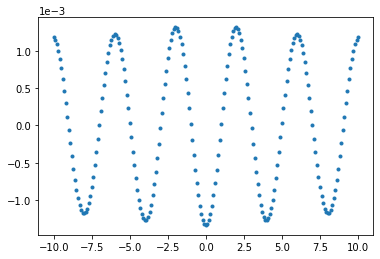

In [128]:
plt.plot(x, pseudo_ift-ccf, '.')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()

**Conclusion: The linear combination of 5 Fourier basis functions are good enough to describe the behaviour of a CCF with S/N up to 10,000. Use the S/N to determine the cut-off frequency in practice.**